In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split

# My imports
import pandas as pd

In [29]:
class MyLinReg(object):
    
    def __init__ (self, n_weights):
        self.weights = np.zeros([(n_weights+1),])
        
    def fit(self,X,y):
        X_1s = np.c_[np.ones([X.shape[0],1]),X]
        X_1s_dagger = np.linalg.pinv(X_1s)
        self.weights = np.matmul(X_1s_dagger,y)
        
    def predict(self,X):
        X_1s = np.c_[np.ones([X.shape[0],1]),X]
        #yhat = np.sign(np.matmul(X_1s,self.weights)) # <-- Used for classifier
        yhat = np.matmul(X_1s,self.weights)           # <-- Used for regression 
        
        return yhat
    
    # For reference and comparison from sklearn classifier classes
    #def score(self,X,y):
    #    from sklearn.metrics import accuracy_score
    #    return accuracy_score(y, self.predict(X), sample_weight=None)
    
    def score(self,X,y):
        yhat = self.predict(X)
        errors = 0 
        for i in range(len(y)):
            if(y[i]!=yhat[i]):
                errors+=1
                
        return 1-(errors/len(y))

In [5]:
df = pd.read_csv("./Task4.csv")

print("Number of Samples  in Dataset:\t",df.shape[0])
print("Number of Features in Dataset:\t",df.shape[1])

Number of Samples  in Dataset:	 100
Number of Features in Dataset:	 2


In [6]:
# Print statistical summary for all attributes
df.describe(include='all')

,X,y
count,100.000000,100.000000
mean,0.499995,0.786404
std,0.293037,0.396402
min,0.000000,-0.347000
25%,0.250250,0.639750
50%,0.500000,0.928000
75%,0.749750,1.075000
max,1.000000,1.270000


In [57]:
X = df['X']
X = np.expand_dims(X, axis=1)
y = df['y']

In [58]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


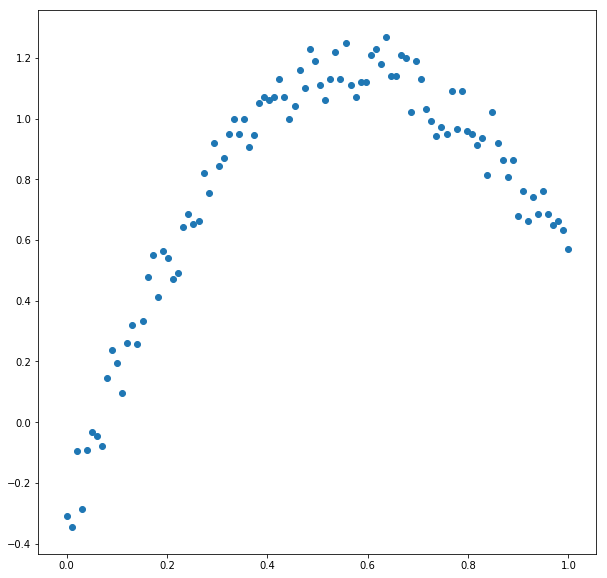

In [59]:
# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
#plt.title("Dataset with Decision Boundary")
plt.scatter(X, y) 


plt.show() 

In [60]:
df['Xsqrd'] = (X)**2

In [61]:
df.describe(include='all')

,X,y,Xsqrd
count,100.000000,100.000000,100.000000
mean,0.499995,0.786404,0.335007
std,0.293037,0.396402,0.302833
min,0.000000,-0.347000,0.000000
25%,0.250250,0.639750,0.062648
50%,0.500000,0.928000,0.250025
75%,0.749750,1.075000,0.562148
max,1.000000,1.270000,1.000000


In [62]:
df.head()

,X,y,Xsqrd
0,0.0000,-0.3080,0.000000
1,0.0101,-0.3470,0.000102
2,0.0202,-0.0937,0.000408
3,0.0303,-0.2860,0.000918
4,0.0404,-0.0927,0.001632


In [63]:
X_parab = df[['X','Xsqrd']].values

In [49]:
print(X_parab)

[[0.00000e+00 0.00000e+00]
 [1.01000e-02 1.02010e-04]
 [2.02000e-02 4.08040e-04]
 [3.03000e-02 9.18090e-04]
 [4.04000e-02 1.63216e-03]
 [5.05000e-02 2.55025e-03]
 [6.06000e-02 3.67236e-03]
 [7.07000e-02 4.99849e-03]
 [8.08000e-02 6.52864e-03]
 [9.09000e-02 8.26281e-03]
 [1.01000e-01 1.02010e-02]
 [1.11000e-01 1.23210e-02]
 [1.21000e-01 1.46410e-02]
 [1.31000e-01 1.71610e-02]
 [1.41000e-01 1.98810e-02]
 [1.52000e-01 2.31040e-02]
 [1.62000e-01 2.62440e-02]
 [1.72000e-01 2.95840e-02]
 [1.82000e-01 3.31240e-02]
 [1.92000e-01 3.68640e-02]
 [2.02000e-01 4.08040e-02]
 [2.12000e-01 4.49440e-02]
 [2.22000e-01 4.92840e-02]
 [2.32000e-01 5.38240e-02]
 [2.42000e-01 5.85640e-02]
 [2.53000e-01 6.40090e-02]
 [2.63000e-01 6.91690e-02]
 [2.73000e-01 7.45290e-02]
 [2.83000e-01 8.00890e-02]
 [2.93000e-01 8.58490e-02]
 [3.03000e-01 9.18090e-02]
 [3.13000e-01 9.79690e-02]
 [3.23000e-01 1.04329e-01]
 [3.33000e-01 1.10889e-01]
 [3.43000e-01 1.17649e-01]
 [3.54000e-01 1.25316e-01]
 [3.64000e-01 1.32496e-01]
 

In [64]:
mlr_orig = MyLinReg(X.shape[1])
mlr_orig.fit(X,y)

In [65]:
yhat_orig = mlr_orig.predict(X)

In [66]:
mlr_parab = MyLinReg(X_parab.shape[1])
mlr_parab.fit(X_parab,y)

In [67]:
yhat_parab = mlr_parab.predict(X_parab)

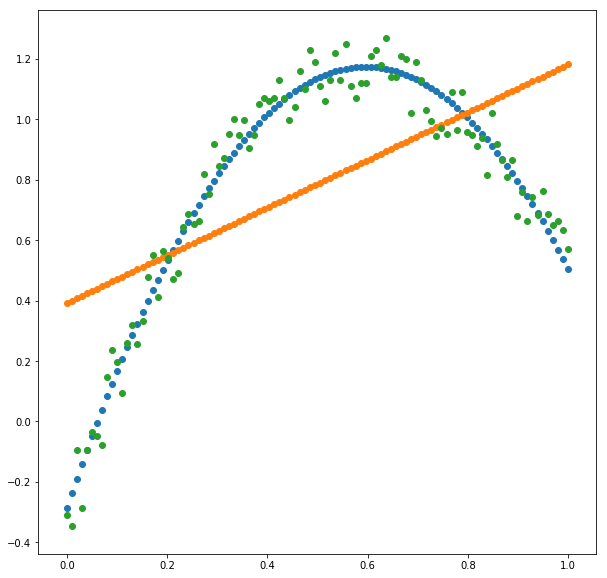

In [69]:
# Plot Training Data
plt.rcParams["figure.figsize"] = (10, 10) 
#plt.title("Dataset with Decision Boundary")
plt.scatter(X, yhat_parab)
plt.scatter(X, yhat_orig)
plt.scatter(X, y) 


plt.show() 